In [29]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from LR_model import LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import seaborn as sns

In [30]:
def delete_high_corr_cols(df):
    corr = df.corr()
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr.columns[i], corr.columns[j]))

    cols_to_drop = []
    for pair in high_corr_pairs:
        cols_to_drop.append(pair[0])
    cols_to_drop = list(set(cols_to_drop))
    df.drop(columns = cols_to_drop, inplace = True)
    return df

In [31]:
# https://archive.ics.uci.edu/dataset/20/census+income
def get_data_adult():
    df = pd.read_csv('data/adult.data', header=None)
    X = df.iloc[:, [0, 2, 4, 10, 11, 12]]
    X = delete_high_corr_cols(X)
    y = [1 if x == ' <=50K' else 0 for x in df.iloc[:, 14]]
    return X, y

In [32]:
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_raisin():
    df = pd.read_csv('data/Raisin_Dataset.arff', skiprows=18, header=None)
    X = df.iloc[:, :7]
    X = delete_high_corr_cols(X)
    y = [1 if x=='Kecimen' else 0 for x in df.iloc[:, 7]]
    return X, y

In [33]:
# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
def get_data_rice():
    df = pd.read_csv('data/Rice_Cammeo_Osmancik.arff', skiprows=16, header=None)
    X = df.iloc[:, :7]
    X = delete_high_corr_cols(X)
    y = [1 if x=='Cammeo' else 0 for x in df.iloc[:, 7]]
    return X, y

## 10+ features

In [34]:
# https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
def get_data_bean():
    df = pd.read_csv('data/Dry_Bean_Dataset.arff', skiprows=25, header=None)
    df.loc[df[16].isin(['SEKER', 'DERMASON']), 16]
    X = df.loc[df[16].isin(['SEKER', 'DERMASON']), 0:15]
    X = delete_high_corr_cols(X)
    y = [1 if x == 'SEKER' else 0 for x in df.loc[df[16].isin(['SEKER', 'DERMASON']), 16]]
    return X, y

In [35]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
def get_data_cancer():
    df = pd.read_csv('data/wdbc.data', header=None)
    X = df.iloc[:, 2:]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 1]
    y = [1 if x == 'M' else 0 for x in y]
    return X, y

In [36]:
# https://archive.ics.uci.edu/dataset/94/spambase
def get_data_spam():
    df = pd.read_csv('data/spambase.data', header=None)
    X = df.iloc[:, :57]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 57]
    return X, y

In [37]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1471
def get_data_eeg():
    df = pd.read_csv('data/phplE7q6h.arff', skiprows=37, header=None)
    X = df.iloc[:, :14]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 14]
    y = [0 if x == 1 else 1 for x in y]
    return X, y

In [38]:
# do wywalenia

# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1053
def get_data_jm1():
    df = pd.read_csv('data/jm1.arff', skiprows=356, header=None)
    X = df.iloc[:, :21]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 21]
    y = [1 if x else 0 for x in y]
    return X, y

In [39]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=59
def get_data_ionosphere():
    df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipfooter=3, header=None)
    X = df.iloc[:, :34]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 34]
    y = [1 if x == 'g' else 0 for x in y]
    return X, y

In [40]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=40701
def get_data_churn():
    df = pd.read_csv('data/churn.arff', skiprows=28, header=None)
    X = df.iloc[:, [0, 1, 3] + [i for i in range(6, 19)]]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 20]
    return X, y

In [45]:
datasets = {
    'adult': get_data_adult(),
    'raisin': get_data_raisin(),
    'rice': get_data_rice(),
    'bean': get_data_bean(),
    'cancer': get_data_cancer(),
    'spam': get_data_spam(),
    'eeg': get_data_eeg(),
    #'jm1': get_data_jm1(), has some issues with data
    'churn': get_data_churn(),
    'ionosphere' : get_data_ionosphere()
}
#adult, eeg, churn trudne zbiory

C:\Users\mipec\AppData\Local\Temp\ipykernel_16484\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)
C:\Users\mipec\AppData\Local\Temp\ipykernel_16484\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)
C:\Users\mipec\AppData\Local\Temp\ipykernel_16484\2698541372.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipfoot

In [67]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
results = {
    'accuracy' : [],
    'algorithm' : [],
    'dataset' : [],
    'learning_rate' : [],
    'likelihood' : [],
}

n_splits = 1
for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(datasets[dataset][0], datasets[dataset][1], test_size=0.2, random_state=420)
    batch_size = 32
    for opt_algorithm in ['SGD', 'IWLS', 'ADAM']:
        for learning_rate in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
            # for r in np.random.randint(1, 10000, n_splits):

            model = LR(learning_rate = learning_rate, n_iterations = 100, interaction_model=False, tol = 1e-6)
            loglikelihood = model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size = (batch_size if opt_algorithm == 'SGD' else -1), loglikelihood=True)
            results['accuracy'].append( balanced_accuracy_score( y_test, model.predict(X_test) ) )
            results['learning_rate'].append(learning_rate)
            results['dataset'].append(dataset)
            results['algorithm'].append(opt_algorithm)
            results['likelihood'].append(loglikelihood)
            print(f'\r{dataset}, {opt_algorithm}, learning_rate = {learning_rate}, accuracy = {results["accuracy"][-1]}, epochs = {len(results["likelihood"][-1])}----------', end="")

adult, SGD, learning_rate = 1e-05, accuracy = 0.5, epochs = 33----------s = 100----------

In [ ]:
df = pd.DataFrame(results)
df['range'] = df['likelihood'].apply(lambda x: len(x))
df.head()

,accuracy,algorithm,dataset,learning_rate,likelihood,range
0,0.550935,SGD,adult,0.010000,"[-18636.45047377938, -18465.693734186803, -183...",100
1,0.612254,SGD,adult,0.001000,"[-18537.591308752097, -18390.800427347953, -18...",100
2,0.550188,SGD,adult,0.000100,"[-17929.457657220635, -18187.09063274628, -178...",12
3,0.597099,SGD,adult,0.000010,"[-18702.356583797566, -18468.689466460357, -18...",100
4,0.500000,SGD,adult,0.000001,"[-18345.864443244638, -18486.66386010168, -179...",83


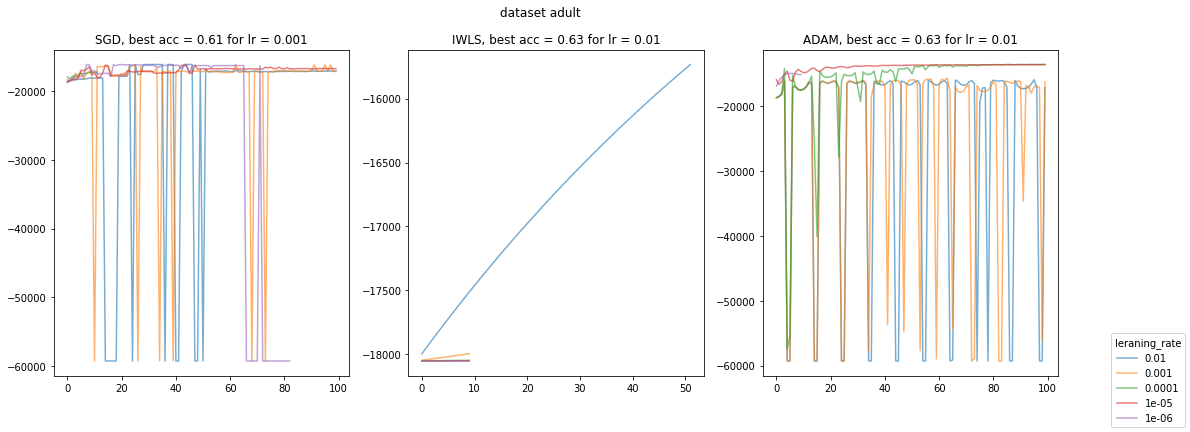

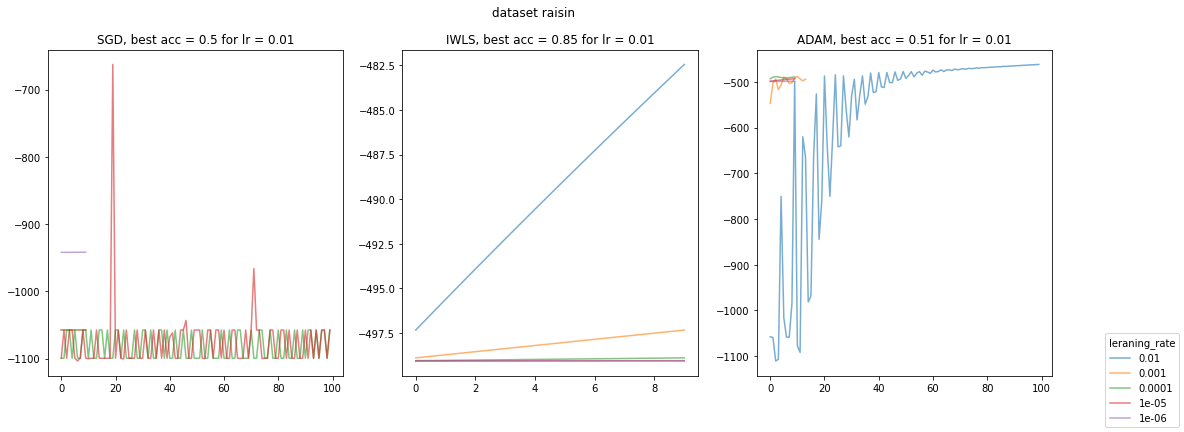

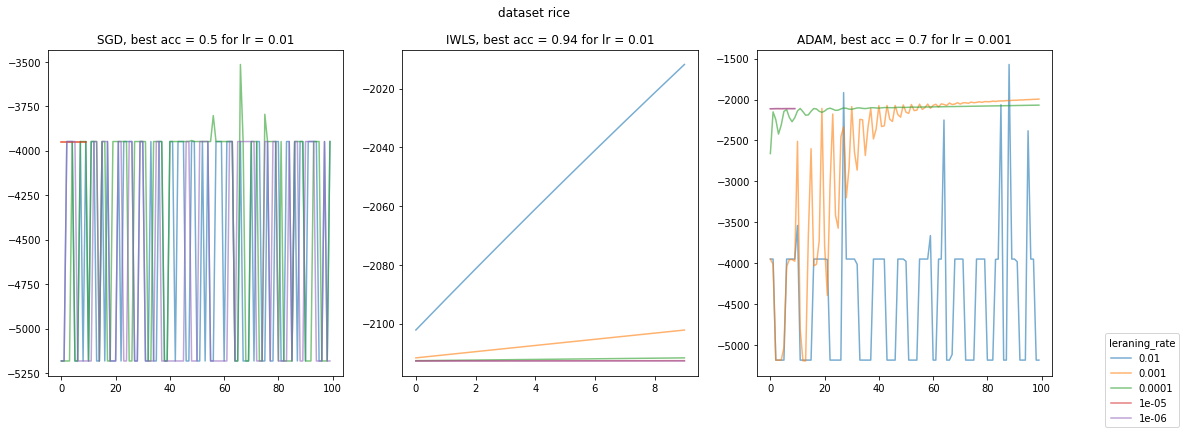

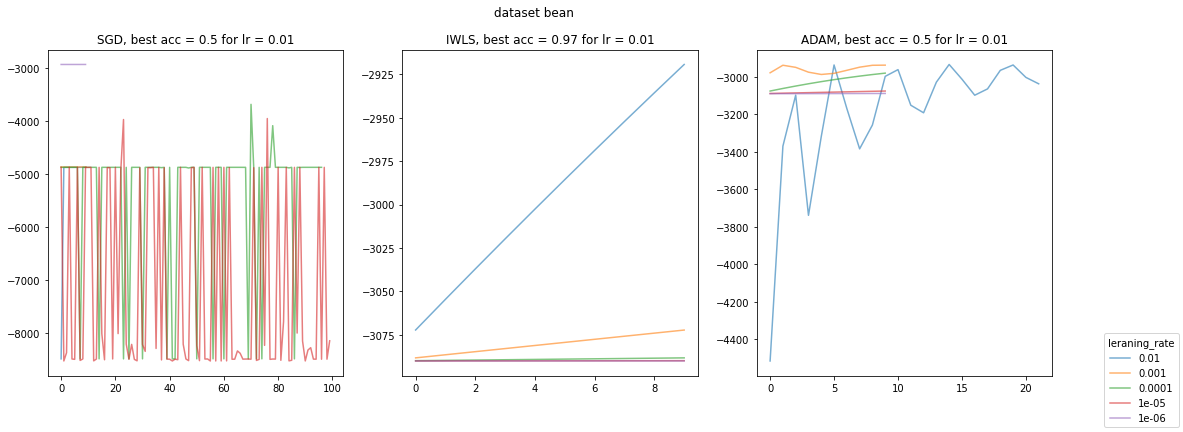

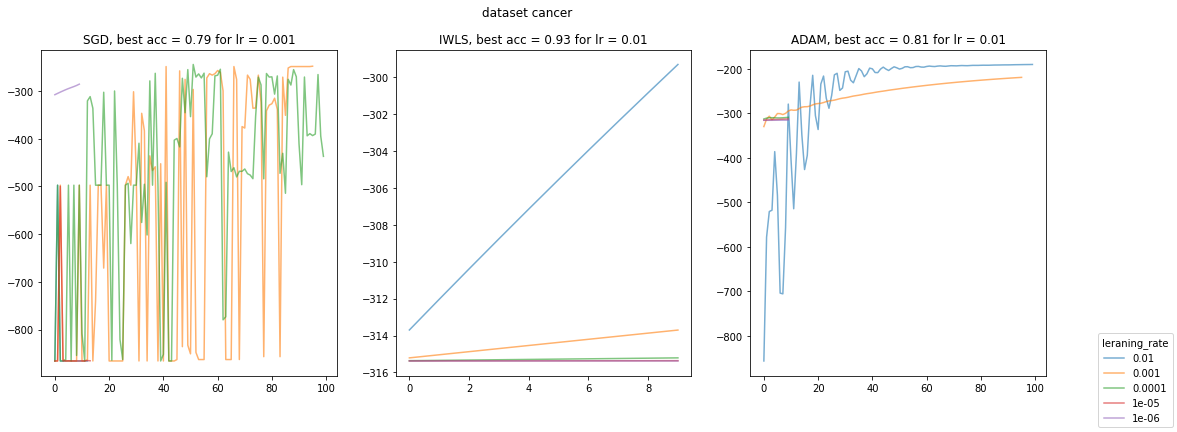

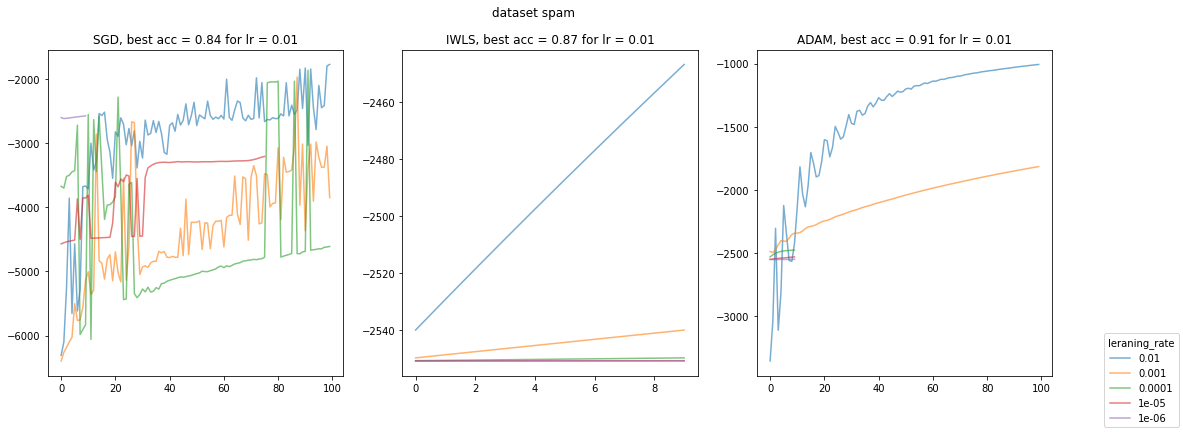

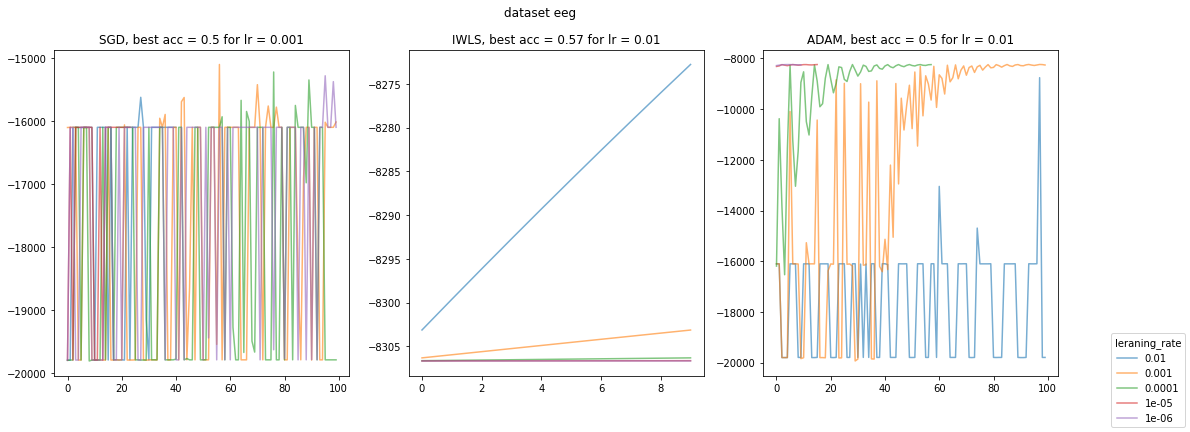

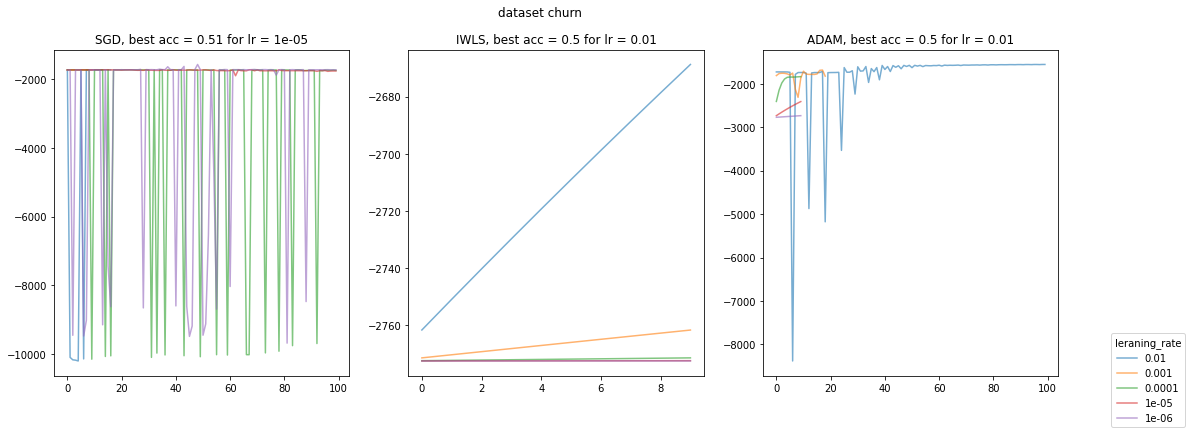

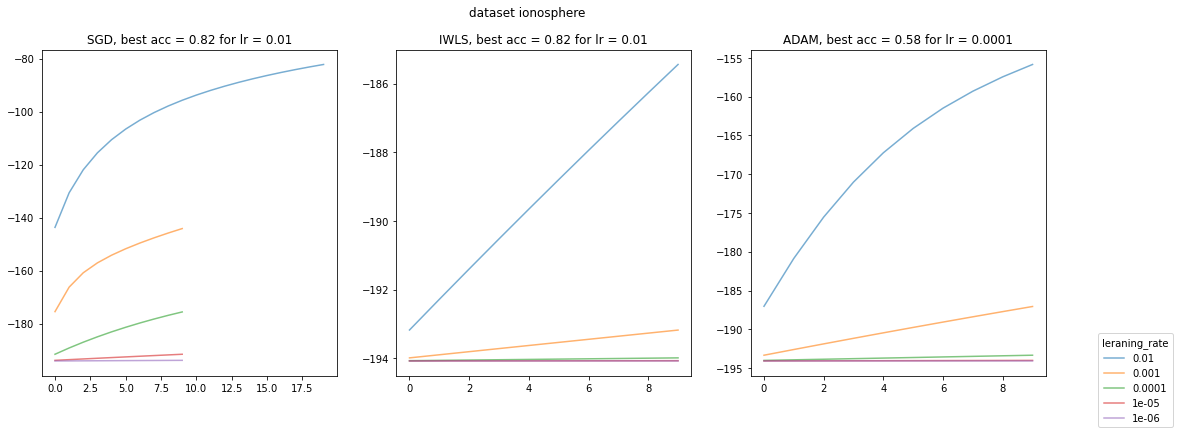

In [ ]:
for ds in datasets:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    handles, labels = [], []
    for ax, alg in zip(np.ravel(axes), ['SGD', 'IWLS', 'ADAM']):
        subset = df[(df['algorithm'] == alg) & (df['dataset'] == ds)]
        subset.reset_index(drop = True, inplace = True)
        for id, row in subset.iterrows():
            line, = ax.plot(list(range(row['range'])), row['likelihood'], label=row['learning_rate'], alpha = 0.6)
            handles.append(line)
            labels.append(row['learning_rate'])
            ax.set_title(f'{alg}, best acc = {np.round(subset["accuracy"].max(), 2)} for lr = {subset["learning_rate"][np.argmax(subset["accuracy"])]}')
    fig.suptitle(f'dataset {ds}')
    legend = fig.legend(handles[:len(subset)], labels, loc='lower right')
    legend.set_title('leraning_rate')
    fig.savefig(f'./media/batch32/{ds}.png', dpi = 200)
    plt.show()  # or savefig() if you want to save the figure

# balanced acc as stopcondition